In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [4]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [5]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [6]:
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [7]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
       
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
    return W

In [8]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

№1

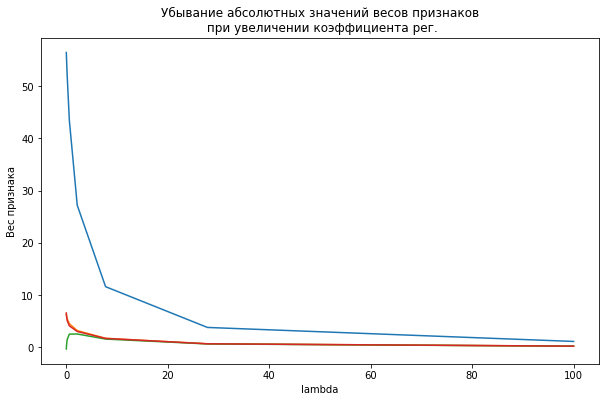

In [9]:
n = 10

coeffs = np.zeros((n, X_st.shape[1]))
lambda_list = np.logspace(-3, 2, n)


for i, val in enumerate(lambda_list):
    w = gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-2, reg=val)
    coeffs[i, :] = w


plt.figure(figsize=(10, 6))
for i in range(X_st.shape[1]):
    plt.plot(lambda_list, coeffs[:, i])

    
plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента рег.')
plt.xlabel('lambda')
plt.ylabel('Вес признака');

№2

In [27]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * np.sign(W) # градиент регуляризации
        
        W -= eta * (dQ + dReg)

        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [28]:
gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-2, reg=1e-4)

Iter: 0, weights: [ 0.6274855  -0.44571575  1.44206376  0.18872715], error 3399.7977627959385
Iter: 500, weights: [56.49765789  5.82486249  1.44592702  5.18374831], error 25.46210924360178
Iter: 1000, weights: [56.49994991  6.16557684  0.28145434  6.05008735], error 24.976129348600537
Iter: 1500, weights: [56.49995     6.25527031 -0.12713233  6.38255108], error 24.913898561134324
Iter: 2000, weights: [56.49995     6.2858351  -0.2735154   6.50314305], error 24.905831908790415
Iter: 2500, weights: [56.49995     6.29675635 -0.32617952  6.54659982], error 24.90477995094858
Iter: 3000, weights: [56.49995     6.30068325 -0.34513424  6.56224432], error 24.90464119064289
Iter: 3500, weights: [56.49995     6.30209649 -0.35195677  6.56787555], error 24.904622323765455
Iter: 4000, weights: [56.49995     6.30260517 -0.35441247  6.56990248], error 24.904619559286026
Iter: 4500, weights: [56.49995     6.30278826 -0.35529638  6.57063205], error 24.9046190858991
Final MSE: 24.904618983093194


array([56.49995   ,  6.30285408, -0.35561417,  6.57089435])

№3

В принципе можно, но данные остаются отмасштабированы по тому методу, который применялся последним.